In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
#Write base url for the data.
baseUrl = "."
os.chdir(baseUrl)

In [104]:
dfCovid = pd.read_pickle('DataRaw/covid19.pkl')
dfCovid.shape

(572270, 21)

In [105]:
dfCovid.describe().T

,count,unique,top,freq
id_de_caso,572270,572270,89700,1
fecha_de_notificaci_n,572270,175,2020-07-27T00:00:00.000,12078
c_digo_divipola,572270,1014,11001,199324
ciudad_de_ubicaci_n,572270,942,Bogotá D.C.,199324
departamento,572270,37,Bogotá D.C.,199324
atenci_n,572270,6,Recuperado,407121
edad,572270,110,30,15385
sexo,572270,4,M,294813
tipo,572270,5,En estudio,542037
estado,572270,6,Leve,462449


In [97]:
dfCovid.groupby(['atenci_n']).size()

atenci_n
Casa            123765
Fallecido        18184
Hospital         20176
Hospital UCI      1853
N/A               1171
Recuperado      407121
dtype: int64

In [106]:
dfCovid=dfCovid[dfCovid['atenci_n']!='N/A']
dfCovid.groupby(['atenci_n']).size()

atenci_n
Casa            123765
Fallecido        18184
Hospital         20176
Hospital UCI      1853
Recuperado      407121
dtype: int64

In [107]:
df_grouped = dfCovid.groupby(['fecha_de_notificaci_n']).size()
df_grouped

fecha_de_notificaci_n
2020-03-02T00:00:00.000       1
2020-03-06T00:00:00.000       1
2020-03-07T00:00:00.000       1
2020-03-08T00:00:00.000       2
2020-03-09T00:00:00.000       3
                           ... 
2020-08-22T00:00:00.000    2898
2020-08-23T00:00:00.000    1345
2020-08-24T00:00:00.000    1416
2020-08-25T00:00:00.000     671
2020-08-26T00:00:00.000    4226
Length: 175, dtype: int64

In [108]:
def showByDate(in_label,grouped):
    df_cum = grouped.groupby([in_label]).count()['id_de_caso']
    df_cumsum = df_cum.sort_index().cumsum()
    ax = df_cumsum.plot(label = in_label, legend = True)

In [126]:
dfCovid['ciudad_de_ubicaci_n'].unique()

array(['Bogotá D.C.', 'Guadalajara de Buga', 'Medellín', 'Itagüí',
       'Cartagena de Indias', 'Neiva', 'Palmira', 'Villavicencio',
       'Rionegro', 'Cali', 'Dosquebradas', 'Cúcuta', 'Manizales',
       'Subachoque', 'Soacha', 'Barranquilla', 'Floridablanca', 'Armenia',
       'Pereira', 'Cajicá', 'Ibagué', 'Bucaramanga', 'Popayán', 'Viterbo',
       'Anapoima', 'La Estrella', 'Envigado', 'Santa Marta', 'Chía',
       'Madrid', 'Villa del Rosario', 'Cartago', 'Yumbo', 'Guarne',
       'Bello', 'Calarcá', 'Valledupar', 'La Dorada', 'Chinchiná',
       'San Andrés', 'Yopal', 'Guatapé', 'Cota', 'Sabaneta', 'Villamaría',
       'Trujillo', 'Pacho', 'Retiro', 'Apartadó', 'Cáceres', 'Ipiales',
       'Los Patios', 'Mosquera', 'La Unión', 'Fusagasugá', 'La Calera',
       'Villeta', 'Palermo', 'San Pedro', 'Calima', 'Funza', 'Tuluá',
       'Soledad', 'El Dovio', 'Santana', 'Frontino', 'Tunja', 'Tocancipá',
       'Puerto Colombia', 'Sahagún', 'Pasto', 'Polonuevo', 'Villapinzón',
       '

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '2020-08-02T00:00:00.000'),
  Text(0.0, 0, '2020-03-02T00:00:00.000'),
  Text(25.0, 0, '2020-03-30T00:00:00.000'),
  Text(50.0, 0, '2020-04-24T00:00:00.000'),
  Text(75.0, 0, '2020-05-19T00:00:00.000'),
  Text(100.0, 0, '2020-06-13T00:00:00.000'),
  Text(125.0, 0, '2020-07-08T00:00:00.000'),
  Text(150.0, 0, '2020-08-02T00:00:00.000'),
  Text(175.0, 0, ''),
  Text(200.0, 0, '')])

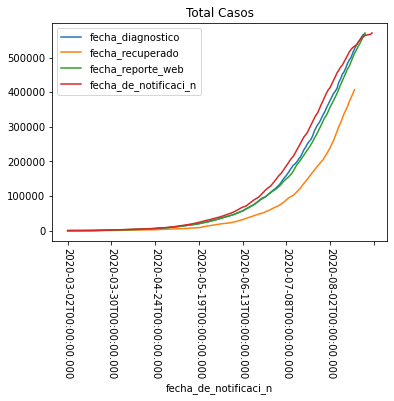

In [112]:
showByDate('fecha_diagnostico',dfCovid)
showByDate('fecha_recuperado',dfCovid)
showByDate('fecha_reporte_web',dfCovid)
showByDate('fecha_de_notificaci_n',dfCovid)
plt.title("Total Casos")
plt.xticks(rotation=-90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(-20.0, 0, '2020-08-06T00:00:00.000'),
  Text(0.0, 0, '2020-03-07T00:00:00.000'),
  Text(20.0, 0, '2020-04-01T00:00:00.000'),
  Text(40.0, 0, '2020-04-22T00:00:00.000'),
  Text(60.0, 0, '2020-05-12T00:00:00.000'),
  Text(80.0, 0, '2020-06-01T00:00:00.000'),
  Text(100.0, 0, '2020-06-21T00:00:00.000'),
  Text(120.0, 0, '2020-07-11T00:00:00.000'),
  Text(140.0, 0, '2020-07-31T00:00:00.000'),
  Text(160.0, 0, '2020-08-20T00:00:00.000'),
  Text(180.0, 0, '')])

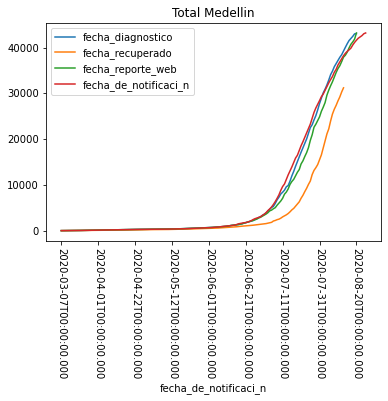

In [133]:
dfMed = dfCovid[(dfCovid['ciudad_de_ubicaci_n']) == 'Medellín']
showByDate('fecha_diagnostico',dfMed)
showByDate('fecha_recuperado',dfMed)
showByDate('fecha_reporte_web',dfMed)
showByDate('fecha_de_notificaci_n',dfMed)
plt.title("Total Medellin")
plt.xticks(rotation=-90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '2020-08-01T00:00:00.000'),
  Text(0.0, 0, '2020-03-02T00:00:00.000'),
  Text(25.0, 0, '2020-04-02T00:00:00.000'),
  Text(50.0, 0, '2020-04-27T00:00:00.000'),
  Text(75.0, 0, '2020-05-22T00:00:00.000'),
  Text(100.0, 0, '2020-06-16T00:00:00.000'),
  Text(125.0, 0, '2020-07-11T00:00:00.000'),
  Text(150.0, 0, '2020-08-05T00:00:00.000'),
  Text(175.0, 0, ''),
  Text(200.0, 0, '')])

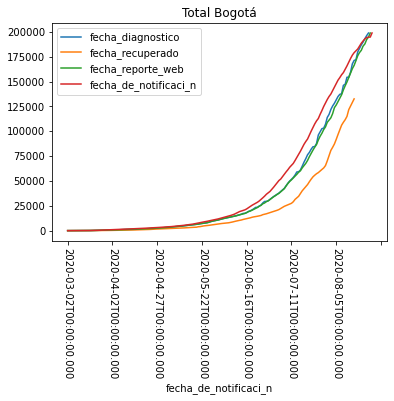

In [134]:
dfBog = dfCovid[(dfCovid['ciudad_de_ubicaci_n'] == 'Bogotá D.C.')]
showByDate('fecha_diagnostico',dfBog)
showByDate('fecha_recuperado',dfBog)
showByDate('fecha_reporte_web',dfBog)
showByDate('fecha_de_notificaci_n',dfBog)
plt.title("Total Bogotá")
plt.xticks(rotation=-90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '2020-08-01T00:00:00.000'),
  Text(0.0, 0, '2020-03-07T00:00:00.000'),
  Text(25.0, 0, '2020-04-06T00:00:00.000'),
  Text(50.0, 0, '2020-05-02T00:00:00.000'),
  Text(75.0, 0, '2020-05-27T00:00:00.000'),
  Text(100.0, 0, '2020-06-21T00:00:00.000'),
  Text(125.0, 0, '2020-07-16T00:00:00.000'),
  Text(150.0, 0, '2020-08-10T00:00:00.000'),
  Text(175.0, 0, ''),
  Text(200.0, 0, '')])

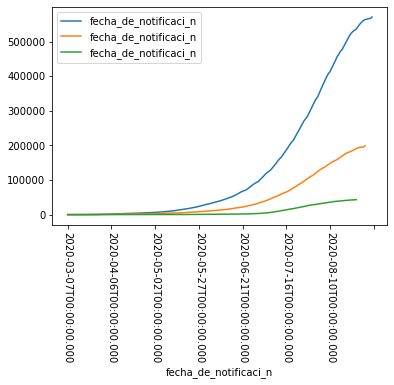

In [137]:
showByDate('fecha_de_notificaci_n',dfCovid)
showByDate('fecha_de_notificaci_n',dfBog)
showByDate('fecha_de_notificaci_n',dfMed)
plt.xticks(rotation=-90)